In [1]:
# encoding=utf8

In [1]:
# Discriminant Analysis

In [37]:
print (__doc__)
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


Automatically created module for IPython interactive environment


# Task 1

In [38]:



cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]
    }
)


In [39]:

plt.cm.register_cmap(cmap=cmap)


In [40]:

def dataset_fixed_cov():
    '''产生两个拥有相同方差的高斯样本集合'''
    n, dim = 300, 2 # 样本数目为300，特征维度为2
    np.random.seed(0)
    c = np.array([[0, -0.23], [0.83, 0.23]]) #高斯分布的方差
    X = np.r_[np.dot(np.random.randn(n, dim), c),
              np.dot(np.random.randn(n, dim), c) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


In [41]:

def dataset_cov():
    '''产生两个拥有不同的方差的高斯样本集合'''
    n, dim = 300, 2
    np.random.seed(0)
    c = np.array([[0.1, -1.0], [2.5, 0.7]]) * 2.0
    X = np.r_[np.dot(np.random.randn(n, dim), c),
              np.dot(np.random.randn(n, dim), c.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


In [42]:

def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with varying covariances')

    tp = (y == y_pred) #正样本中，分类正确的数目
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0 , X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # 类别0分类正确的点和分类错误的点
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '.', color='#990000')

    # 类别1分类正确的点和分类错误的点
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '.', color='#000099')

    # 类别0和类别1的区域
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    # 求出LDA的概率分布
    z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    z = z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, z,
                   cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    # 这里的等高线，就是对应的决策面
    # LDA的决策面是直线，而QDA的决策面是二次曲线
    # 注意图中右下角那张图，途中的决策面是双曲线
    # 为了更清楚的看出其为双曲线，可以去掉后面两行代码的注释
    plt.contour(xx, yy, z, [0.5], linewidths=2., colors='k')
    #plt.contour(xx, yy, z, [0.4, 0.6], linewidths=2., colors='g')
    #plt.contour(xx, yy, z, [0.3, 0.7], linewidths=2., colors='b')

    # 类别0和类别1的中心点
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='k', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][2],
             'o', color='k', markersize=10)



In [43]:

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    print(i)
    # 线性判别式分析
    lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plt.axis('tight')

    # 二次判别分析
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index= 2 * i + 2)
    plt.axis('tight')


0


IndexError: index 2 is out of bounds for axis 0 with size 2

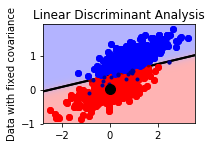

In [44]:

plt.show()

# Tast 2

Automatically created module for IPython interactive environment


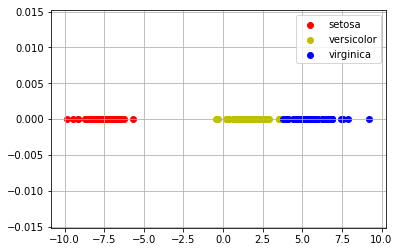

In [45]:
print (__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 读取iris数据，
# 这个数据的特征维度为4维
# 样本的类别有三中
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

# 将数据的特征维度降为一维
# 当然这里可以将n_components设置为任何小于原始特征维度的数目
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X, y).transform(X)
X_Zreo = np.zeros(X_r2.shape)

for c ,i , target_names in zip('ryb', [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i], X_Zreo[y == i], c=c, label=target_names)

plt.grid()
plt.legend()
plt.show()